In [1]:
import pandas as pd
from matplotlib import pyplot as plt
#import seaborn as sns

In [2]:
!pip install sdv
import sdv

from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

from sdv.evaluation.single_table import evaluate_quality
from sdv.evaluation.single_table import run_diagnostic

from sdv.evaluation.single_table import get_column_plot
from sdv.evaluation.single_table import get_column_pair_plot
!pip install table_evaluator
from table_evaluator import load_data, TableEvaluator


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 20.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using 

In [26]:
df=pd.read_csv("pokemon_train_set.csv")

In [27]:
df.drop('Name',axis=1,inplace=True)

In [60]:
df.head(1)

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution,Total
0,Grass,Poison,45,49,49,65,65,45,1,False,Basic,318


In [61]:
metadata = SingleTableMetadata()

In [62]:
metadata.detect_from_dataframe(df)

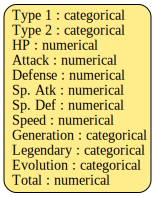

In [63]:
metadata.visualize()

In [10]:
synthesizer = CTGANSynthesizer(metadata,epochs=1800,batch_size=80,discriminator_steps=3,discriminator_lr=0.001,generator_lr=0.002,verbose=True)
#) #,,discriminator_lr=0.1, generator_lr=0.1
synthesizer.fit(df)
#---> 91 %


Gen. (0.04) | Discrim. (0.09): 100%|██████████| 1800/1800 [35:51<00:00,  1.20s/it]


In [12]:
# synthesizer._model.loss_values

In [13]:
synthesizer.save(
    filepath='my_synthesizer.pkl'
)

In [29]:
df.sample(2)

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution
523,Ground,Flying,75,95,125,45,75,95,4,False,Stage1
71,Psychic,NaN,55,50,65,175,95,150,1,False,Mega


In [30]:
synthetic_data = synthesizer.sample(num_rows=len(df))
synthetic_data.sample(2)

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution
16,Steel,Ground,54,75,74,72,52,123,4,False,Basic
226,Psychic,NaN,154,166,73,167,142,116,3,True,Basic


In [32]:
fig = synthesizer.get_loss_values_plot()
fig.show()

In [ ]:
# plt.bar(["real","syn.","real & syn."],[len(df),len(synthetic_data),len(df)+len(synthetic_data)])
# plt.title("real data vs. syntetic and real data");

In [34]:
diagnostic = run_diagnostic(
    real_data=df,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...


|          | 0/11 [00:00<?, ?it/s]|
(1/2) Evaluating Data Validity: |██████████| 11/11 [00:00<00:00, 268.00it/s]|
Data Validity Score: 100.0%


|          | 0/1 [00:00<?, ?it/s]|
(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 73.58it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [35]:
quality_report = evaluate_quality(
    df,
    synthetic_data,
    metadata
)

Generating report ...


|          | 0/11 [00:00<?, ?it/s]|
(1/2) Evaluating Column Shapes: |██████████| 11/11 [00:00<00:00, 379.33it/s]|
Column Shapes Score: 91.47%


|          | 0/55 [00:00<?, ?it/s]|
(2/2) Evaluating Column Pair Trends: |          | 0/55 [00:00<?, ?it/s]|
(2/2) Evaluating Column Pair Trends: |▌         | 3/55 [00:00<00:01, 26.18it/s]|
(2/2) Evaluating Column Pair Trends: |█         | 6/55 [00:00<00:02, 23.31it/s]|
(2/2) Evaluating Column Pair Trends: |█▋        | 9/55 [00:00<00:01, 25.01it/s]|
(2/2) Evaluating Column Pair Trends: |██▎       | 13/55 [00:00<00:01, 27.59it/s]|
(2/2) Evaluating Column Pair Trends: |██▉       | 16/55 [00:00<00:01, 27.69it/s]|
(2/2) Evaluating Column Pair Trends: |███▊      | 21/55 [00:00<00:00, 34.21it/s]|
(2/2) Evaluating Column Pair Trends: |████▉     | 27/55 [00:00<00:00, 39.86it/s]|
(2/2) Evaluating Column Pair Trends: |██████    | 33/55 [00:00<00:00, 44.23it/s]|
(2/2) Evaluating Column Pair Trends: |██████▉   | 38/55 [00:01<00:00, 

In [ ]:
fig=quality_report.get_visualization('Column Shapes')
fig.show()

In [36]:
fig = get_column_plot(
    real_data=df,
    synthetic_data=synthetic_data,
    column_name='Generation',
    metadata=metadata
)

fig.show()

In [37]:
fig2 = get_column_pair_plot(
    real_data=df,
    synthetic_data=synthetic_data,
    column_names=["Attack","Defense"],
    metadata=metadata
)
fig2.show()

In [38]:
fig2 = get_column_pair_plot(
    real_data=df,
    synthetic_data=synthetic_data,
    column_names=['Sp. Atk','Sp. Def'],
    metadata=metadata
)
fig2.show()

In [39]:
df['Total']=df[["HP","Attack","Defense","Sp. Atk","Sp. Def","Speed"]].sum(axis=1)

In [40]:
synthetic_data['Total']=synthetic_data[["HP","Attack","Defense","Sp. Atk","Sp. Def","Speed"]].sum(axis=1)

In [ ]:
metadata.detect_from_dataframe(df)

In [56]:
df.sample(1)

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution,Total
537,Psychic,NaN,75,75,130,75,130,95,4,True,Basic,580


In [57]:
synthetic_data.sample(1)

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution,Total
59,Psychic,NaN,120,125,92,127,166,106,3,True,Basic,736


In [64]:
fig2 = get_column_pair_plot(
    real_data=df,
    synthetic_data=synthetic_data,
    column_names=["Generation","Total"],
    metadata=metadata
)
fig2.show()

In [65]:
fig2 = get_column_pair_plot(
    real_data=df,
    synthetic_data=synthetic_data,
    column_names=["Type 1","Total"],
    metadata=metadata
)
fig2.show()

In [66]:
fig2 = get_column_pair_plot(
    real_data=df,
    synthetic_data=synthetic_data,
    column_names=["Type 2", "Total"],
    metadata=metadata
)
fig2.show()


In [67]:
fig = get_column_plot(
    real_data=df,
    synthetic_data=synthetic_data,
    column_name='Attack',
    metadata=metadata
)

fig.show()

In [52]:
fig = get_column_plot(
    real_data=df,
    synthetic_data=synthetic_data,
    column_name='Defense',
    metadata=metadata
)

fig.show()

In [53]:
fig = get_column_plot(
    real_data=df,
    synthetic_data=synthetic_data,
    column_name='Evolution',
    metadata=metadata
)

fig.show()

In [ ]:
#ist nicht so gut , aber für eine schnelle an sicht gut da nur eine Zeile zu schreiben ist und viele grafiken gen werden
table_evaluator =  TableEvaluator(df, synthetic_data )# cat_cols= categorical_features)

table_evaluator.visual_evaluation()

In [54]:
synthetic_data.to_csv("syn.csv")